In [1]:
import os, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('datasets/life_expectancy.csv')

data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2699,Turkmenistan,2013,Developing,65.4,228.0,7,2.93,63.748112,98.0,0,...,98.0,2.12,98.0,0.1,734.425250,5366277.0,3.2,3.3,0.678,10.7
667,Cuba,2005,Developing,77.2,19.0,1,4.48,518.935922,95.0,0,...,99.0,9.39,89.0,0.1,3779.577000,NaN,3.4,3.3,0.719,14.2
2188,Saint Vincent and the Grenadines,2011,Developing,72.7,16.0,0,7.02,0.000000,96.0,0,...,96.0,4.99,96.0,0.1,NaN,NaN,3.5,3.5,0.712,13.3
492,Cameroon,2003,Developing,51.8,412.0,60,4.64,67.639253,NaN,899,...,72.0,4.97,73.0,7.7,824.868939,16513822.0,7.2,7.3,0.452,8.1
1948,Pakistan,2009,Developing,64.8,175.0,371,0.03,0.697216,78.0,863,...,7.0,2.94,71.0,0.1,16.639990,1674958.0,2.5,2.9,0.514,7.3


In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
countries = data['Country'].unique()

na_cols = data.columns[data.isna().any()].tolist()

for col in na_cols:
    for country in countries:
        data.loc[data['Country'] == country, col] = data.loc[data['Country'] == country, col]\
                                                         .fillna(data[data['Country'] == country][col].mean())

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data = data.dropna()

data.shape

(2128, 22)

In [8]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [9]:
data['Country'].value_counts()

Ethiopia       16
Nigeria        16
Togo           16
Ghana          16
Romania        16
               ..
Fiji           16
Montenegro     16
Philippines    16
Sweden         16
Tonga          16
Name: Country, Length: 133, dtype: int64

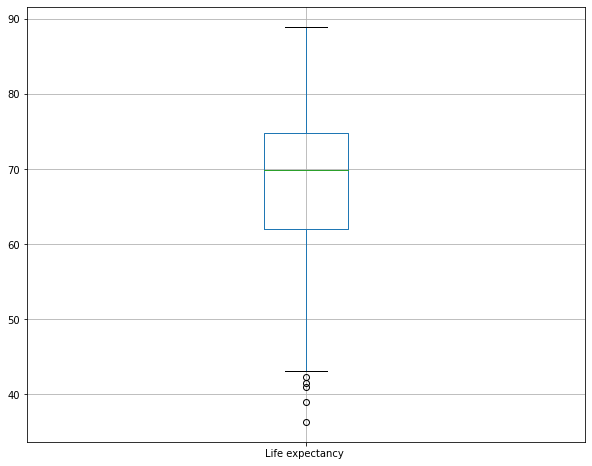

In [10]:
plt.figure(figsize=(10, 8))

data.boxplot('Life expectancy ')

plt.show()

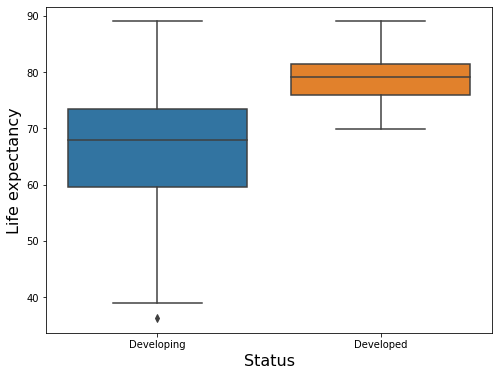

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Life expectancy ', data=data)

plt.xlabel('Status', fontsize=16)
plt.ylabel('Life expectancy', fontsize=16)

plt.show()

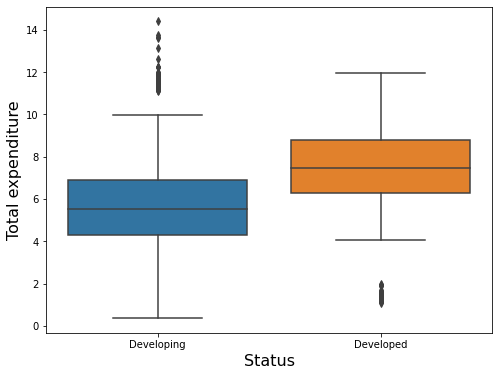

In [12]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Total expenditure', data=data)

plt.xlabel('Status', fontsize=16)
plt.ylabel('Total expenditure', fontsize=16)

plt.show()

In [13]:
data_corr = data[['Life expectancy ',
                  'Adult Mortality',
                  'Schooling',
                  'Total expenditure',
                  'Diphtheria ',
                  'GDP',
                  'Population']].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


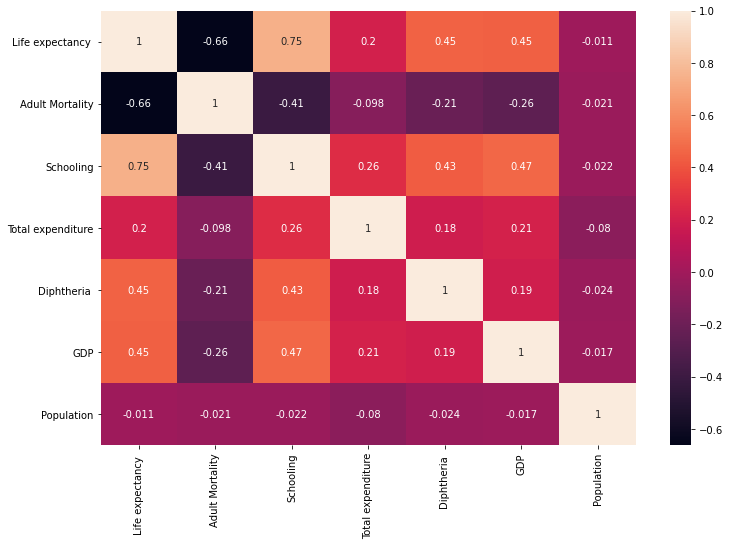

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [15]:
features = data.drop('Life expectancy ', axis=1)

target = data[['Life expectancy ']]

In [16]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
target.sample(5)

,Life expectancy
2601,68.3
1476,52.1
2300,49.7
2603,67.7
2671,74.7


In [18]:
features = features.drop('Country', axis = 1)

features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [20]:
categorical_features = pd.get_dummies(categorical_features)

categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
numeric_features = features.drop(['Status'], axis=1)

numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [23]:
standardscaler = StandardScaler()

numeric_features = pd.DataFrame(standardscaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns, 
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [24]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [25]:
processed_features.shape

(2128, 21)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [27]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((1702, 21), (426, 21)), ((1702, 1), (426, 1)))

In [28]:
def build_single_layer_model():

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(32,
                                    input_shape=(x_train.shape[1],),
                                    activation='sigmoid'))
    
    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss='mse',
                  metrics=['mae', 'mse'],
                  optimizer=optimizer)

    return model

In [29]:
model = build_single_layer_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


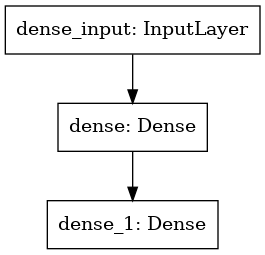

In [30]:
tf.keras.utils.plot_model(model)

In [31]:
num_epochs = 100

training_history = model.fit(x_train,
                             y_train,
                             epochs = num_epochs,
                             validation_split = 0.2,
                             verbose = True)

Epoch 1/100
43/43 [==============================] - 0s 7ms/step - loss: 4126.6191 - mae: 63.5682 - mse: 4126.6191 - val_loss: 3495.7222 - val_mae: 58.5440 - val_mse: 3495.7222
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 2827.5449 - mae: 52.3682 - mse: 2827.5449 - val_loss: 2136.3525 - val_mae: 45.4128 - val_mse: 2136.3525
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 1569.4583 - mae: 38.4081 - mse: 1569.4583 - val_loss: 1057.1591 - val_mae: 31.3886 - val_mse: 1057.1591
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 726.4421 - mae: 25.4046 - mse: 726.4421 - val_loss: 457.3410 - val_mae: 19.7765 - val_mse: 457.3410
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 306.3394 - mae: 15.6581 - mse: 306.3394 - val_loss: 195.2942 - val_mae: 12.1922 - val_mse: 195.2942
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 134.0334 - mae: 9.8513 - mse: 134.0334 - val_loss:

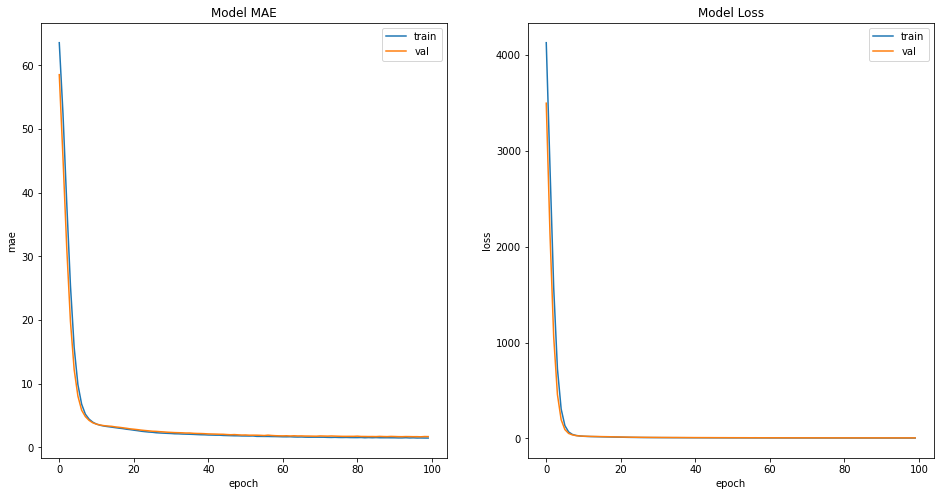

In [32]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [33]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 6.1070 - mae: 1.7790 - mse: 6.1070


[6.107038974761963, 1.77898108959198, 6.107038974761963]

In [34]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9323453222130843

In [35]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten()}, index=range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
112,67.9,68.452423
69,79.5,78.686203
129,73.1,74.441917
171,63.9,63.047741
300,77.5,78.546143
333,55.8,59.967514
278,68.6,72.050659
184,71.0,72.907524
26,72.0,71.195618
331,76.0,77.017456


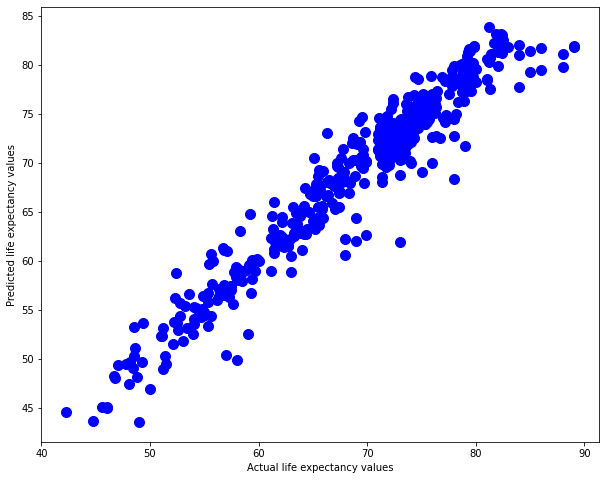

In [36]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=100, c='blue')

plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()

In [37]:
def build_multiple_layer_model():

    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)

    return model

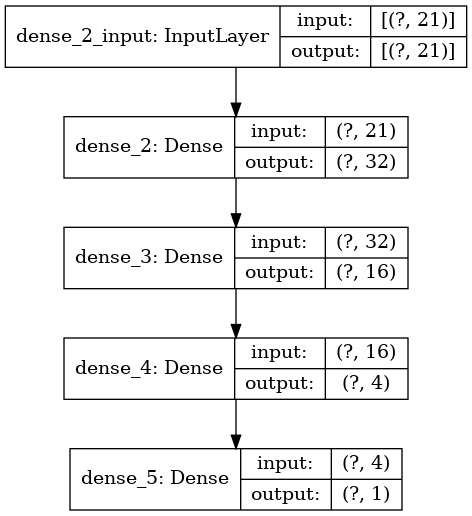

In [38]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
!rm -rf seq_logs

!ls -l

total 1340
-rw-r--r-- 1 axperez axperez   5200 Sep 22 15:04 EagerExecution.ipynb
-rw-r--r-- 1 axperez axperez 275304 Oct  7 21:37 FunctionalModel.ipynb
-rw-r--r-- 1 axperez axperez  10450 Sep 24 15:36 GradientTape.ipynb
-rw-r--r-- 1 axperez axperez 694400 Oct  7 13:20 SequentialModel.ipynb
-rw-r--r-- 1 axperez axperez 286855 Sep 24 15:59 SimpleLinearRegression.ipynb
drwxr-xr-x 2 axperez axperez   4096 Oct  7 13:54 datasets
-rw-r--r-- 1 axperez axperez  28502 Oct  7 21:41 model.png
-rw-r--r-- 1 axperez axperez  38111 Sep 22 16:02 tf.function.ipynb
-rw-r--r-- 1 axperez axperez  11397 Sep 24 15:36 v1Sessions.ipynb


In [40]:
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [41]:
training_history = model.fit(x_train,
                             y_train, 
                             validation_split=0.2,
                             epochs = 500,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

l_mae: 2.0311 - val_mse: 8.1295
Epoch 380/500
14/14 [==============================] - 0s 5ms/step - loss: 4.2719 - mae: 1.5174 - mse: 4.2719 - val_loss: 8.1693 - val_mae: 2.0575 - val_mse: 8.1693
Epoch 381/500
14/14 [==============================] - 0s 6ms/step - loss: 4.4053 - mae: 1.5368 - mse: 4.4053 - val_loss: 8.1759 - val_mae: 2.0352 - val_mse: 8.1759
Epoch 382/500
14/14 [==============================] - 0s 6ms/step - loss: 4.3793 - mae: 1.5434 - mse: 4.3793 - val_loss: 8.2322 - val_mae: 2.0599 - val_mse: 8.2322
Epoch 383/500
14/14 [==============================] - 0s 5ms/step - loss: 4.2784 - mae: 1.5018 - mse: 4.2784 - val_loss: 8.1806 - val_mae: 2.0300 - val_mse: 8.1806
Epoch 384/500
14/14 [==============================] - 0s 5ms/step - loss: 4.2449 - mae: 1.5095 - mse: 4.2449 - val_loss: 8.2915 - val_mae: 2.0597 - val_mse: 8.2915
Epoch 385/500
14/14 [==============================] - 0s 9ms/step - loss: 4.2987 - mae: 1.5307 - mse: 4.2987 - val_loss: 8.1660 - val_mae: 2.0

In [42]:
%load_ext tensorboard

In [43]:
%tensorboard --logdir seq_logs --port 6050

Reusing TensorBoard on port 6050 (pid 3797), started 10:13:39 ago. (Use '!kill 3797' to kill it.)

In [44]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 5.7881 - mae: 1.7430 - mse: 5.7881


[5.788086891174316, 1.7429946660995483, 5.788086891174316]

In [45]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.935878716624188

In [46]:
def build_model_with_sgd():

    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)

    return model

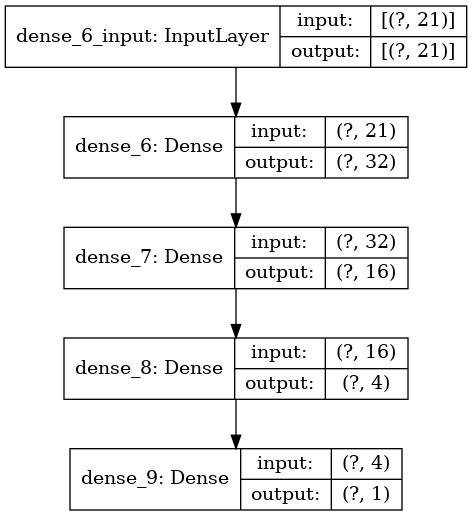

In [47]:
model_sgd = build_model_with_sgd()

tf.keras.utils.plot_model(model_sgd, show_shapes=True)

In [48]:
training_history = model_sgd.fit(x_train,
                                 y_train,
                                 validation_split=0.2,
                                 epochs=100,
                                 batch_size=100)

Epoch 1/100
14/14 [==============================] - 0s 16ms/step - loss: 4521.5903 - mae: 66.5141 - mse: 4521.5903 - val_loss: 2616.2246 - val_mae: 50.0807 - val_mse: 2616.2246
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1313.6917 - mae: 28.4941 - mse: 1313.6917 - val_loss: 1080.9868 - val_mae: 28.3971 - val_mse: 1080.9868
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 1088.9526 - mae: 25.7060 - mse: 1088.9526 - val_loss: 2245.2153 - val_mae: 46.2930 - val_mse: 2245.2156
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 431.1288 - mae: 16.1539 - mse: 431.1288 - val_loss: 347.8064 - val_mae: 16.6152 - val_mse: 347.8064
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 197.9747 - mae: 11.5871 - mse: 197.9747 - val_loss: 63.2305 - val_mae: 6.3086 - val_mse: 63.2305
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 86.2160 - mae: 7.9691 - mse: 86.2160 - val_loss: 70

In [49]:
model_sgd.evaluate(x_test, y_test)

14/14 [==============================] - 0s 5ms/step - loss: 6.5601 - mae: 1.8034 - mse: 6.5601


[6.5600972175598145, 1.803421139717102, 6.5600972175598145]

In [50]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test, y_pred)

0.9273262576745364

In [51]:
def build_model_with_rmsprop():

    model = keras.Sequential([layers.Dense(16, input_shape = (x_train.shape[1], ), activation = 'elu'),
                              layers.Dense(8, activation = 'elu'),
                              layers.Dense(4, activation = 'elu'),
                              layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)

    return model

In [52]:
 model_rmsprop = build_model_with_rmsprop()

In [53]:
training_history = model_rmsprop.fit(x_train,
                                     y_train,
                                     validation_split=0.2,
                                     epochs=100,
                                     batch_size=100)

Epoch 1/100
14/14 [==============================] - 0s 35ms/step - loss: 4667.2856 - mae: 67.5956 - mse: 4667.2847 - val_loss: 4625.2788 - val_mae: 67.3310 - val_mse: 4625.2788
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 4569.3262 - mae: 66.9023 - mse: 4569.3262 - val_loss: 4535.1772 - val_mae: 66.6922 - val_mse: 4535.1772
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 4470.2832 - mae: 66.1947 - mse: 4470.2832 - val_loss: 4433.9702 - val_mae: 65.9654 - val_mse: 4433.9702
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 4358.4624 - mae: 65.3771 - mse: 4358.4619 - val_loss: 4321.4292 - val_mae: 65.1430 - val_mse: 4321.4292
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 4235.0562 - mae: 64.4647 - mse: 4235.0562 - val_loss: 4195.9766 - val_mae: 64.2084 - val_mse: 4195.9766
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 4099.4219 - mae: 63.4400 - mse: 4099.

In [54]:
model_rmsprop.evaluate(x_test, y_test)

14/14 [==============================] - 0s 6ms/step - loss: 9.9819 - mae: 2.3612 - mse: 9.9819


[9.981858253479004, 2.3612165451049805, 9.981858253479004]

In [55]:
y_pred = model_rmsprop.predict(x_test)

r2_score(y_pred, y_test)

0.8809260275143225